In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt
prices=pd.read_excel('./上证50成分股.xlsx',header=0,index_col=0)
returns=np.log(prices/prices.shift(1))
returns=returns.dropna()
returns_17to19=returns.loc['2018-01-02':'2019-12-31']
returns_mean=returns_17to19.mean()*252
# print('股票 2018年至 2019 年的年化平均收益率\n',returns_mean.round(6))
vol=returns_17to19.std()*np.sqrt(252)
returns_cov=returns_17to19.cov()*np.sqrt(252)
def F(w):
    Rf = 0.02
    w = np.array(w)
    Rp = np.sum(w * returns_mean)
    Vp = np.sqrt(np.dot(w, np.dot(returns_cov, w.T)))
    SR = (Rp - Rf) / Vp
    return np.array([Rp, Vp, SR])
def SRmin_F(w):
    return -F(w)[2]
cons=({'type':'eq','fun':lambda x: np.sum(x)-1})
bnds=tuple((0,1) for x in range(len(returns_mean)))
w0=np.ones_like(returns_mean)/len(returns_mean)
result=sco.minimize(SRmin_F,w0,method='SLSQP',bounds=bnds,constraints=cons)

weight=result['x']
stock_name=returns_mean.index
# profolio = dict()
# for i in range(len(returns_mean)):
#     print(stock_name[i],round(weight[i],6))
#     profolio[stock_name[i]] = round(weight[i],6)

#得出权重
# weight = pd.DataFrame.from_dict(profolio)
# print(weight)

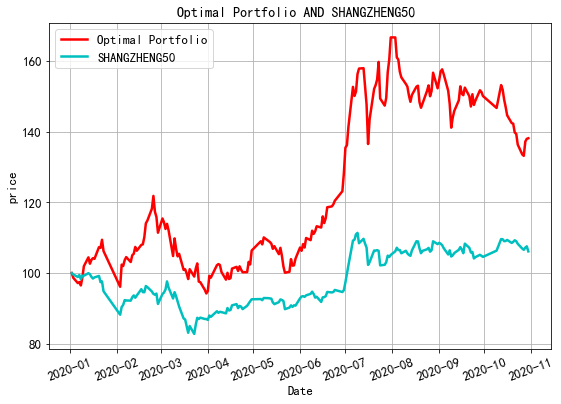

In [7]:
prices_20 = pd.read_excel('./上证50成份2020.xlsx', sheet_name="Sheet1", header=0, index_col=0)
Index_20 = pd.read_excel('./上证50指数2020.xlsx', sheet_name="Sheet1", header=0, index_col=0)
Index_20 = 100 * (Index_20 / Index_20.iloc[0])
prices_20=prices_20[prices.columns].loc['2020-01-02':'2020-10-30']
port_price_20=100*np.sum(weight*prices_20/prices_20.iloc[0],axis=1)
plt.figure(figsize=(9,6))
plt.plot(port_price_20,'r-',label=u'Optimal Portfolio',lw=2.5)
plt.plot(Index_20,'c-',label=u'SHANGZHENG50',lw=2.5)
plt.xlabel(u'Date',fontsize=13)
plt.xticks(fontsize=13,rotation=20)
plt.ylabel(u'price',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'Optimal Portfolio AND SHANGZHENG50 ', fontsize=14)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()